In [1]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!ls
!ls "/gdrive/My Drive/Colab Notebooks/"

sample_data
1_oneClass_classification.ipynb    dataset.zip
2_multiClass_classification.ipynb  multi-trash.zip


In [0]:
import zipfile as zf
files = zf.ZipFile("/gdrive/My Drive/Colab Notebooks/dataset.zip",'r')
files.extractall()
files.close()

In [4]:
!ls

dataset  sample_data


In [5]:
# 2가지 class의 쓰레기 이미지 10개
files = zf.ZipFile("/gdrive/My Drive/Colab Notebooks/multi-trash.zip",'r')
files.extractall()
files.close()
!ls

dataset        trash9991.jpg  trash9994.jpg  trash9997.jpg
sample_data    trash9992.jpg  trash9995.jpg  trash9998.jpg
trash9990.jpg  trash9993.jpg  trash9996.jpg  trash9999.jpg


In [6]:
import os
os.listdir(os.path.join(os.getcwd(), "dataset"))

['trash', 'glass', 'paper', 'cardboard', 'metal', 'plastic']

In [7]:
from pathlib import Path
path = Path(os.getcwd())/"dataset"
path

PosixPath('/content/dataset')

In [0]:
# train, valid, test 구조로 분할하는 함수
def split_indices(folder,seed1,seed2):    
    n = len(os.listdir(folder))
    full_set = list(range(1,n+1))

    # train 인덱싱
    random.seed(seed1)
    train = random.sample(list(range(1,n+1)), int(.5*n)) # 50%를 train 폴더로 이동
    remain = list(set(full_set)-set(train))

    # valid 인덱싱
    random.seed(seed2)
    valid = random.sample(remain, int(.5*len(remain))) # 남은 것들 중 50%(전체 25%)를 valid 폴더로 이동
    test = list(set(remain)-set(valid))
    
    return(train,valid,test)

# 인덱싱에 따라 파일 이름을 구하기
def get_names(waste_type, indices):
    file_names = [waste_type+str(i)+".jpg" for i in indices]
    return(file_names)    

# 파일의 위치를 옮기는 함수
def move_files(source_files, destination_folder):
    for file in source_files:
        shutil.move(file, destination_folder)

In [0]:
import random
import shutil

# 데이터 종류 / 쓰레기 타입 설정
subsets = ['train','valid']
waste_types = ['cardboard','glass','metal','paper','plastic','trash']

# data/데이터 종류/쓰레기 타입 디렉토리가 존재하지 않으면 폴더를 생성한다.
for subset in subsets:
    for waste_type in waste_types:
        folder = os.path.join('data', subset, waste_type)
        if not os.path.exists(folder):
            os.makedirs(folder)
            
# test 폴더는 쓰레기 타입 디렉토리가 포함되지 않으므로 따로 작성
if not os.path.exists(os.path.join('data','test')):
    os.makedirs(os.path.join('data','test'))
            
# 각 쓰레기 타입별로 
for waste_type in waste_types:
    source_folder = os.path.join('dataset', waste_type)
    train_ind, valid_ind, test_ind = split_indices(source_folder,1,1)
    
    # 파일들을 train 폴더로 옮김
    train_names = get_names(waste_type,train_ind)
    train_source_files = [os.path.join(source_folder,name) for name in train_names]
    move_files(train_source_files, "data/train/" + waste_type)
    
    # 파일들을 valid 폴더로 옮김
    valid_names = get_names(waste_type,valid_ind)
    valid_source_files = [os.path.join(source_folder,name) for name in valid_names]
    move_files(valid_source_files, "data/valid/" + waste_type)
    
    # 파일들을 test폴더로 옮김
    test_names = get_names(waste_type,test_ind)
    test_source_files = [os.path.join(source_folder,name) for name in test_names]
    move_files(test_source_files,"data/test")    # test 폴더는 쓰레기 타입 미포함

In [10]:
!ls
# 2가지 class의 쓰레기 이미지 10개는 모두 test 데이터로 사용한다.
!mv trash999*.jpg data/test
!ls

data	     trash9990.jpg  trash9993.jpg  trash9996.jpg  trash9999.jpg
dataset      trash9991.jpg  trash9994.jpg  trash9997.jpg
sample_data  trash9992.jpg  trash9995.jpg  trash9998.jpg
data  dataset  sample_data


In [11]:
# 2가지 class의 쓰레기 이미지를 만드는데 사용된 본래 이미지는 train 및 valid 데이터에서 삭제한다.
# train 폴더 안에 대해서 수행
!rm data/train/cardboard/cardboard147.jpg data/train/cardboard/cardboard109.jpg data/train/cardboard/cardboard294.jpg
!rm data/train/glass/glass93.jpg data/train/glass/glass103.jpg data/train/glass/glass39.jpg data/train/glass/glass11.jpg
!rm data/train/metal/metal190.jpg data/train/metal/metal36.jpg data/train/metal/metal14.jpg
!rm data/train/paper/paper305.jpg data/train/paper/paper143.jpg data/train/paper/paper396.jpg
!rm data/train/plastic/plastic234.jpg data/train/plastic/plastic171.jpg data/train/plastic/plastic88.jpg data/train/plastic/plastic406.jpg data/train/plastic/plastic236.jpg
!rm data/train/trash/trash36.jpg data/train/trash/trash5.jpg

rm: cannot remove 'data/train/cardboard/cardboard147.jpg': No such file or directory
rm: cannot remove 'data/train/cardboard/cardboard109.jpg': No such file or directory
rm: cannot remove 'data/train/glass/glass39.jpg': No such file or directory
rm: cannot remove 'data/train/metal/metal36.jpg': No such file or directory
rm: cannot remove 'data/train/paper/paper305.jpg': No such file or directory
rm: cannot remove 'data/train/paper/paper143.jpg': No such file or directory
rm: cannot remove 'data/train/paper/paper396.jpg': No such file or directory
rm: cannot remove 'data/train/plastic/plastic234.jpg': No such file or directory
rm: cannot remove 'data/train/plastic/plastic406.jpg': No such file or directory
rm: cannot remove 'data/train/trash/trash36.jpg': No such file or directory
rm: cannot remove 'data/train/trash/trash5.jpg': No such file or directory


In [12]:
# valid 폴더 안에 대해서 수행
!rm data/valid/cardboard/cardboard147.jpg data/valid/cardboard/cardboard109.jpg data/valid/cardboard/cardboard294.jpg
!rm data/valid/glass/glass93.jpg data/valid/glass/glass103.jpg data/valid/glass/glass39.jpg data/valid/glass/glass11.jpg
!rm data/valid/metal/metal190.jpg data/valid/metal/metal36.jpg data/valid/metal/metal14.jpg
!rm data/valid/paper/paper305.jpg data/valid/paper/paper143.jpg data/valid/paper/paper396.jpg
!rm data/valid/plastic/plastic234.jpg data/valid/plastic/plastic171.jpg data/valid/plastic/plastic88.jpg data/valid/plastic/plastic406.jpg data/valid/plastic/plastic236.jpg
!rm data/valid/trash/trash36.jpg data/valid/trash/trash5.jpg

rm: cannot remove 'data/valid/cardboard/cardboard109.jpg': No such file or directory
rm: cannot remove 'data/valid/cardboard/cardboard294.jpg': No such file or directory
rm: cannot remove 'data/valid/glass/glass93.jpg': No such file or directory
rm: cannot remove 'data/valid/glass/glass103.jpg': No such file or directory
rm: cannot remove 'data/valid/glass/glass39.jpg': No such file or directory
rm: cannot remove 'data/valid/glass/glass11.jpg': No such file or directory
rm: cannot remove 'data/valid/metal/metal190.jpg': No such file or directory
rm: cannot remove 'data/valid/metal/metal36.jpg': No such file or directory
rm: cannot remove 'data/valid/metal/metal14.jpg': No such file or directory
rm: cannot remove 'data/valid/paper/paper143.jpg': No such file or directory
rm: cannot remove 'data/valid/plastic/plastic234.jpg': No such file or directory
rm: cannot remove 'data/valid/plastic/plastic171.jpg': No such file or directory
rm: cannot remove 'data/valid/plastic/plastic88.jpg': No 

In [13]:
from fastai.vision import *

path = Path(os.getcwd())/"data"
tfms = get_transforms(do_flip=True, flip_vert=True)
data = ImageDataBunch.from_folder(path, test="test", ds_tfms=tfms, bs=16)
data

ImageDataBunch;

Train: LabelList (1253 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
trash,trash,trash,trash,trash
Path: /content/data;

Valid: LabelList (627 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
trash,trash,trash,trash,trash
Path: /content/data;

Test: LabelList (645 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: EmptyLabelList
,,,,
Path: /content/data

In [14]:
data.classes

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

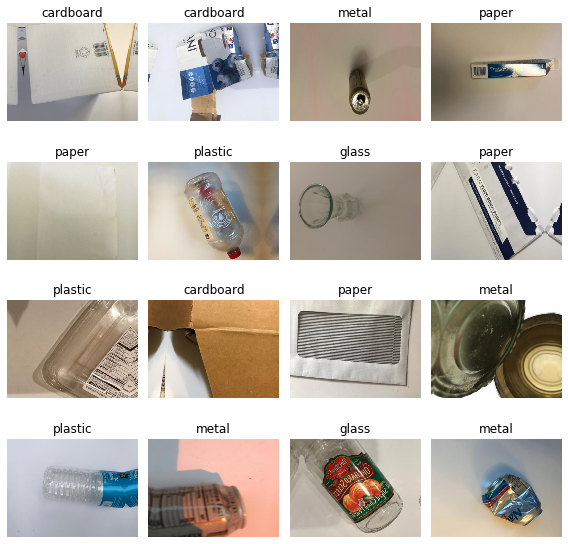

In [15]:
data.show_batch(rows=4, figsize=(8,8))

In [16]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
# learn.model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 38.7MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.16E-03
Min loss divided by 10: 2.57E-03


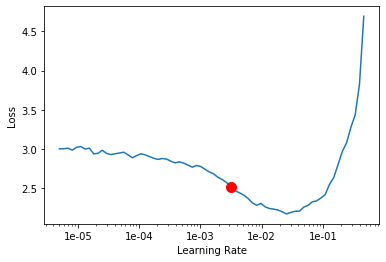

In [25]:
learn.lr_find(start_lr=1e-6, end_lr=1e1)
learn.recorder.plot(suggestion=True)

In [26]:
learn.fit_one_cycle(20, max_lr=3.16E-03)

epoch,train_loss,valid_loss,error_rate,time
0,1.859092,0.833188,0.279107,00:32
1,1.255430,0.571174,0.188198,00:32
2,0.905549,0.549288,0.164274,00:32
3,0.772747,0.571502,0.177033,00:32
4,0.742242,0.495029,0.151515,00:32
5,0.659530,0.458831,0.146730,00:32
6,0.698661,0.463965,0.140351,00:32
7,0.622292,0.416964,0.135566,00:32
8,0.501888,0.555940,0.167464,00:32
9,0.490398,0.394373,0.122807,00:32


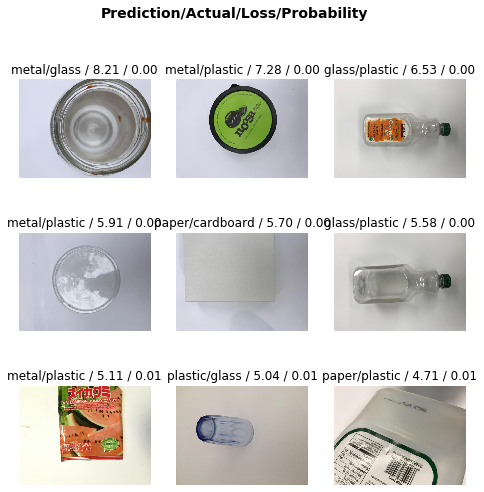

In [27]:
# loss 값이 큰 것들 순서대로
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(8,8))

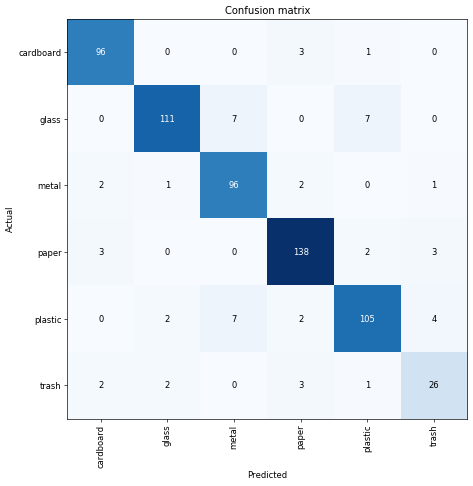

In [28]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

In [29]:
# 가장 혼동되는 조합 정렬
interp.most_confused()

[('glass', 'metal', 7),
 ('glass', 'plastic', 7),
 ('plastic', 'metal', 7),
 ('plastic', 'trash', 4),
 ('cardboard', 'paper', 3),
 ('paper', 'cardboard', 3),
 ('paper', 'trash', 3),
 ('trash', 'paper', 3),
 ('metal', 'cardboard', 2),
 ('metal', 'paper', 2),
 ('paper', 'plastic', 2),
 ('plastic', 'glass', 2),
 ('plastic', 'paper', 2),
 ('trash', 'cardboard', 2),
 ('trash', 'glass', 2),
 ('cardboard', 'plastic', 1),
 ('metal', 'glass', 1),
 ('metal', 'trash', 1),
 ('trash', 'plastic', 1)]

# **2. 테스트 데이터**

In [32]:
preds = learn.get_preds(ds_type=DatasetType.Test)
print(preds[0].shape)
print(preds[0])

torch.Size([645, 6])
tensor([[4.1700e-03, 8.3084e-01, 1.0877e-01, 8.0540e-03, 4.7884e-02, 2.7997e-04],
        [5.5169e-03, 6.1834e-06, 4.1633e-08, 9.9353e-01, 8.6750e-04, 7.6306e-05],
        [3.2868e-04, 2.8359e-06, 6.8421e-05, 9.9722e-01, 4.1817e-04, 1.9606e-03],
        ...,
        [3.7350e-04, 3.2514e-04, 1.0451e-05, 1.0461e-05, 9.9927e-01, 1.3301e-05],
        [1.0000e+00, 2.3053e-11, 1.1049e-10, 4.9054e-08, 1.5014e-07, 3.6181e-08],
        [2.8178e-05, 7.1501e-07, 1.1995e-05, 9.9771e-01, 5.4657e-04, 1.7002e-03]])


In [33]:
data.classes

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [35]:
# 각 이미지의 tensor 최대값의 위치 번호를 부여
max_idxs = np.asarray(np.argmax(preds[0],axis=1))
max_idxs

array([1, 3, 3, 4, ..., 1, 4, 0, 3])

In [36]:
# 부여된 번호를 토대로 class의 이름을 부여
yhat = []
for max_idx in max_idxs:
    yhat.append(data.classes[max_idx])

# yhat은 모든 이미지가 1가지 class를 가진다고 가정했을 때 예측값
print(yhat)

['glass', 'paper', 'paper', 'plastic', 'paper', 'cardboard', 'glass', 'trash', 'glass', 'paper', 'metal', 'cardboard', 'plastic', 'paper', 'paper', 'metal', 'plastic', 'paper', 'paper', 'cardboard', 'plastic', 'metal', 'cardboard', 'plastic', 'paper', 'plastic', 'plastic', 'paper', 'paper', 'paper', 'plastic', 'metal', 'plastic', 'paper', 'metal', 'metal', 'paper', 'plastic', 'metal', 'trash', 'glass', 'cardboard', 'trash', 'metal', 'cardboard', 'paper', 'trash', 'metal', 'metal', 'plastic', 'cardboard', 'glass', 'plastic', 'paper', 'paper', 'cardboard', 'paper', 'metal', 'paper', 'trash', 'metal', 'glass', 'metal', 'cardboard', 'metal', 'cardboard', 'glass', 'plastic', 'trash', 'plastic', 'glass', 'paper', 'metal', 'cardboard', 'glass', 'paper', 'plastic', 'metal', 'metal', 'paper', 'metal', 'glass', 'plastic', 'glass', 'cardboard', 'metal', 'metal', 'cardboard', 'paper', 'metal', 'paper', 'metal', 'metal', 'paper', 'paper', 'cardboard', 'metal', 'plastic', 'metal', 'paper', 'paper', 

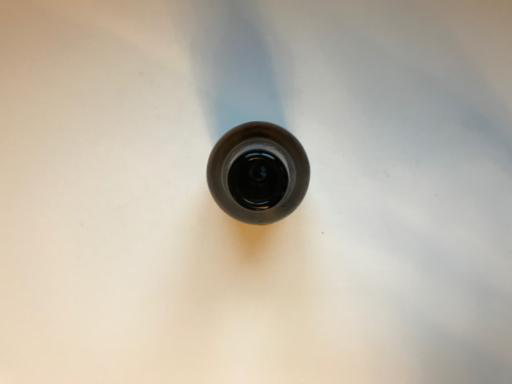

In [37]:
# 첫번째 test 데이터의 이미지 확인
learn.data.test_ds[0][0]

In [40]:
y = []
# 각 이미지 파일의 경로를 저장
for label_path in data.test_ds.items:
    y.append(str(label_path))

# (파일 경로를 통해) 2가지 class의 쓰레기 파일의 인덱스를 저장
multiClass_pred_index = []
for i in range(10) :
    multiClass_pred_index.append(y.index('/content/data/test/trash999'+ str(i) + '.jpg'))

# 파일 이름을 통해 정답값을 추출.
# multiClass 이미지는 파일 이름이 trash로 시작하므로 일단은 y(정답값)에 trash로 저장됨.
pattern = re.compile("([a-z]+)[0-9]+")
for i in range(len(y)):
    y[i] = pattern.search(y[i]).group(1)

print(y)
print(multiClass_pred_index)

['glass', 'paper', 'paper', 'plastic', 'paper', 'cardboard', 'glass', 'trash', 'glass', 'paper', 'metal', 'cardboard', 'plastic', 'paper', 'paper', 'metal', 'plastic', 'paper', 'paper', 'cardboard', 'plastic', 'cardboard', 'cardboard', 'plastic', 'paper', 'plastic', 'plastic', 'paper', 'paper', 'paper', 'plastic', 'metal', 'plastic', 'paper', 'metal', 'metal', 'paper', 'plastic', 'metal', 'trash', 'glass', 'cardboard', 'trash', 'metal', 'cardboard', 'paper', 'trash', 'metal', 'metal', 'plastic', 'cardboard', 'glass', 'plastic', 'cardboard', 'paper', 'cardboard', 'paper', 'metal', 'paper', 'trash', 'metal', 'glass', 'metal', 'cardboard', 'metal', 'cardboard', 'glass', 'glass', 'trash', 'plastic', 'glass', 'paper', 'metal', 'cardboard', 'glass', 'paper', 'trash', 'metal', 'metal', 'paper', 'metal', 'glass', 'trash', 'glass', 'cardboard', 'metal', 'metal', 'cardboard', 'paper', 'metal', 'paper', 'metal', 'metal', 'trash', 'cardboard', 'metal', 'metal', 'plastic', 'metal', 'paper', 'paper'

In [41]:
# 예측값
print(yhat[0:5])
# 실제값
print(y[0:5])

['glass', 'paper', 'paper', 'plastic', 'paper']
['glass', 'paper', 'paper', 'plastic', 'paper']


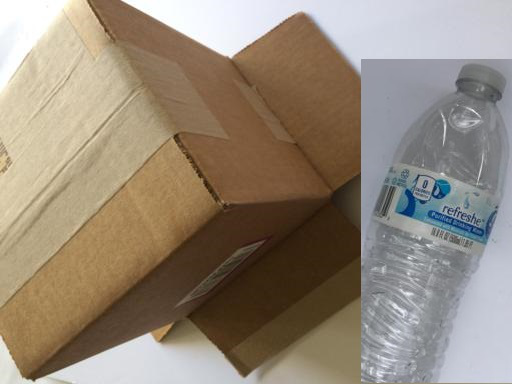

In [43]:
# multiClass 첫번째 이미지 확인
learn.data.test_ds[multiClass_pred_index[0]][0]

In [44]:
# multiClass 이미지들의 tensor 값 확인
for i in multiClass_pred_index :
    print(learn.predict(learn.data.test_ds[i][0])[2] )
# data.classes : ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

tensor([9.9990e-01, 9.0485e-09, 7.8294e-09, 2.7463e-07, 9.4581e-05, 3.6630e-06])
tensor([6.2961e-06, 9.2912e-01, 7.0869e-02, 2.0450e-07, 1.0415e-06, 7.5428e-07])
tensor([3.0345e-03, 6.8846e-05, 6.5156e-01, 3.2736e-01, 7.4278e-03, 1.0541e-02])
tensor([2.3162e-01, 7.5302e-01, 1.3266e-04, 1.3223e-04, 1.4552e-02, 5.3779e-04])
tensor([1.7578e-04, 2.1419e-02, 3.2032e-03, 2.9736e-04, 9.2949e-01, 4.5418e-02])
tensor([3.6840e-07, 1.0168e-06, 1.1273e-07, 9.9984e-01, 8.7967e-05, 7.4492e-05])
tensor([2.7797e-03, 7.5693e-06, 2.4605e-07, 9.9715e-01, 1.6667e-05, 4.9846e-05])
tensor([0.0073, 0.0268, 0.1045, 0.0058, 0.8477, 0.0079])
tensor([1.5989e-06, 8.8728e-01, 1.1809e-06, 4.5079e-06, 1.1270e-01, 7.9246e-06])
tensor([2.3204e-05, 5.8513e-01, 1.8227e-03, 2.8015e-04, 4.1256e-01, 1.8374e-04])


In [46]:
# multiClass 이미지에 대해서만 결과 출력
for i in multiClass_pred_index :
    # display(learn.data.test_ds[i][0])
    result = learn.predict(learn.data.test_ds[i][0])[2]
    print(result)
    for index, value in enumerate(result) :
        # print(value, data.classes[index])
        if value > 0.01 :
            print(value, data.classes[index])

tensor([9.9990e-01, 9.0485e-09, 7.8294e-09, 2.7463e-07, 9.4581e-05, 3.6630e-06])
tensor(0.9999) cardboard
tensor([6.2961e-06, 9.2912e-01, 7.0869e-02, 2.0450e-07, 1.0415e-06, 7.5428e-07])
tensor(0.9291) glass
tensor(0.0709) metal
tensor([3.0345e-03, 6.8846e-05, 6.5156e-01, 3.2736e-01, 7.4278e-03, 1.0541e-02])
tensor(0.6516) metal
tensor(0.3274) paper
tensor(0.0105) trash
tensor([2.3162e-01, 7.5302e-01, 1.3266e-04, 1.3223e-04, 1.4552e-02, 5.3779e-04])
tensor(0.2316) cardboard
tensor(0.7530) glass
tensor(0.0146) plastic
tensor([1.7578e-04, 2.1419e-02, 3.2032e-03, 2.9736e-04, 9.2949e-01, 4.5418e-02])
tensor(0.0214) glass
tensor(0.9295) plastic
tensor(0.0454) trash
tensor([3.6840e-07, 1.0168e-06, 1.1273e-07, 9.9984e-01, 8.7967e-05, 7.4492e-05])
tensor(0.9998) paper
tensor([2.7797e-03, 7.5693e-06, 2.4605e-07, 9.9715e-01, 1.6667e-05, 4.9846e-05])
tensor(0.9971) paper
tensor([0.0073, 0.0268, 0.1045, 0.0058, 0.8477, 0.0079])
tensor(0.0268) glass
tensor(0.1045) metal
tensor(0.8477) plastic
tenso

In [47]:
# 모든 이미지에 대해서 결과 저장
yhat2 = []
for i in range(len(data.test_ds.items)) :
    # display(learn.data.test_ds[i][0])
    result = learn.predict(learn.data.test_ds[i][0])[2]
    # print(result)
    trashClass = ""
    for index, value in enumerate(result) :
        # print(value, data.classes[index])
        if value > 0.01 :
            if trashClass == "" : trashClass = data.classes[index]
            else : trashClass += " & " + data.classes[index]
            # print(value, data.classes[index])
    yhat2.append(trashClass)

# yhat2는 각 이미지에 대해 임계값이 넘는 class를 모두 출력 : ex) 'glass & metal & plastic'
print(yhat2)

['glass & metal & plastic', 'paper', 'paper', 'plastic', 'cardboard & glass & paper', 'cardboard', 'glass & plastic', 'paper & trash', 'glass', 'paper', 'glass & metal & paper & trash', 'cardboard & trash', 'plastic', 'paper', 'paper', 'metal', 'glass & plastic', 'paper', 'paper', 'cardboard', 'plastic', 'cardboard & metal & paper & plastic & trash', 'cardboard', 'plastic & trash', 'paper', 'plastic', 'plastic & trash', 'paper', 'paper', 'paper & trash', 'plastic', 'glass & metal & plastic & trash', 'glass & plastic', 'paper', 'metal', 'glass & metal', 'paper & plastic & trash', 'plastic & trash', 'metal', 'trash', 'glass', 'cardboard', 'glass & paper & plastic & trash', 'glass & metal & plastic', 'cardboard', 'paper', 'paper & trash', 'metal', 'metal & plastic', 'glass & metal & plastic', 'cardboard & glass & metal & paper', 'glass', 'plastic', 'cardboard & paper', 'paper & plastic', 'cardboard', 'paper', 'cardboard & metal & paper', 'paper', 'plastic & trash', 'metal', 'glass', 'meta

In [0]:
# yhat3은 yhat2에서 '&' 문자를 가지고 있는 경우에 일괄적으로 'multi'라고 저장.
yhat3 = list(yhat2)
for i in range(len(yhat3)) :
    if '&' in yhat3[i] :
        yhat3[i] = "multi"

# multiClass 이미지는 y에 'trash'라고 저장되어 있지만, y3에서는 'multi'라고 저장
y3 = list(y)
for i in multiClass_pred_index :
    y3[i] = "multi"

[[ 77   0   0   1   0   0  23]
 [  0  65   2   0   0   0  59]
 [  0   0  55   0   0   0  48]
 [  0   0   0 119   0   0  30]
 [  0   0   0   0  82   0  39]
 [  0   0   0   1   0   7  27]
 [  1   0   0   2   0   0   7]]


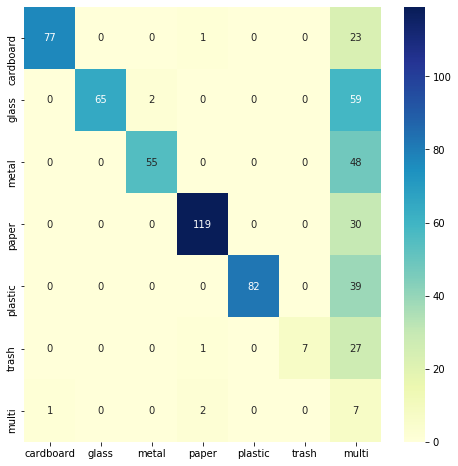

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y3, yhat3, labels=waste_types+["multi"])
print(cm)

import seaborn as sns
df_cm = pd.DataFrame(cm, waste_types + ["multi"], waste_types + ["multi"])

plt.figure(figsize=(8,8))
sns.heatmap(df_cm,annot=True, fmt="d", cmap="YlGnBu")

In [50]:
count = 0
for i in range(len(y3)) :
    if y[i] != "multi" and y[i] == yhat3[i] :
        count += 1

count += 5
print("accuracy :", count / len(y3) * 100)
# multiClass 이미지가 10개밖에 없어서 사실상 oneClass 이미지에 대한 정확도임.

accuracy : 63.565891472868216


In [0]:
# 리눅스 상에 저장된 폴더를 삭제함.
shutil.rmtree("data")
shutil.rmtree("dataset")

In [52]:
!ls

sample_data
